In [22]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn import model_selection
import numpy as np

In [23]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [24]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,,0,,1.000000,NO


<Axes: title={'center': 'list_m'}, xlabel='clases'>

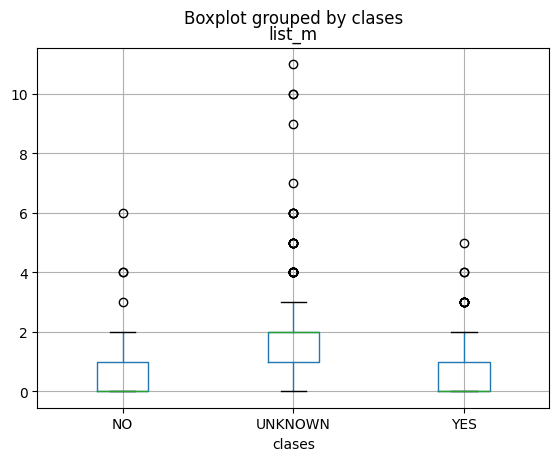

In [25]:
train.boxplot(by="clases",column="list_m")

In [26]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [27]:
train=train.drop(["verbT","verbH"],axis=1)

In [28]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [29]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

# Modelo 

In [30]:
clf = svm.SVC()
clf.fit(X, y_train)

SVC()

# TEST

In [31]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [32]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,,0,,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,,0,,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,,0,,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,,0,,1.000000,YES
4,0.000000,0.000000,1.691,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,20,0.000000,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,rush,0,,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.833333,0,,0,,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.333333,0,,0,,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.750000,0,,0,,0.666667,UNKNOWN


In [33]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES
4,0.000000,0.000000,1.691,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.833333,0,0,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.333333,0,0,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.750000,0,0,0.666667,UNKNOWN


In [34]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [35]:
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [36]:
predictions=clf.predict(X_t)

In [37]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[282 128]
 [172 218]]


In [38]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.62
precision:  0.62
recall 0.69
f1_score:  0.65
matthews_score:  0.25


In [39]:
print(classification_report( y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       390
           1       0.62      0.69      0.65       410

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.62      0.62       800



In [40]:
X_train_cv=np.concatenate((X, X_t), axis=0)
Y_train_cv=np.concatenate((y_train, y_test), axis=0)

In [41]:
name='SVM'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

SVM Acurracy:: 0.660000 (0.116216)
SVM Precision:: 0.680000 (0.129628)
SVM Recall:: 0.690000 (0.110065)
SVM F1-score:: 0.670000 (0.098603)


In [42]:
name='SVM'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

SVM: 0.300000 (0.242383)
